# 1- Creating fibers 

- Define a single straight fiber as fiber object.

- Define a curved fiber as fiber object.
    - Fill this “fiber” with fibers with 1/10th of the original radius.
    - Visualize the fiber bundle (e.g. with matplotlib)



In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib qt

import fastpli.model.sandbox as sandbox

def set_3d_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

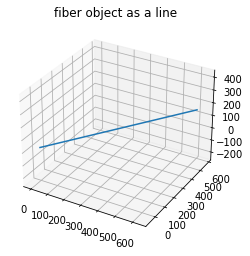

In [7]:
t = np.linspace(0, 4 * np.pi, 50, True)
traj = np.array((50 * t, 50 * t, 15 * t)).T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(
    traj[:, 0],
    traj[:, 1],
    traj[:, 2],
)
plt.title("fiber object as a line")
set_3d_axes_equal(ax)
plt.show()

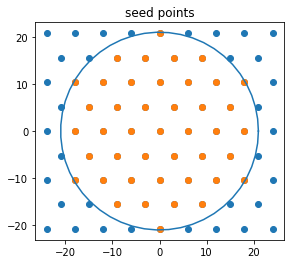

In [36]:
seeds = sandbox.seeds.triangular_grid(width=49,
                                      height=49,
                                      spacing=6,
                                      center=True)
radius = 21
circ_seeds = sandbox.seeds.crop_circle(radius=radius, seeds=seeds)
fig, ax = plt.subplots(1, 1)
plt.title("seed points")
plt.scatter(seeds[:, 0], seeds[:, 1])
plt.scatter(circ_seeds[:, 0], circ_seeds[:, 1])
ax.set_aspect('equal', 'box')

# plotting the circlular margin
t = np.linspace(0, 2 * np.pi, 52)
x = radius * np.cos(t)
y = radius * np.sin(t)
plt.plot(x, y)
plt.show()

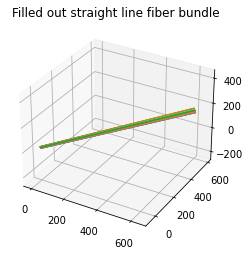

In [32]:
# populating line fiber 
fiber_bundle = sandbox.build.bundle(
    traj=traj,
    seeds=circ_seeds,
    radii=np.random.uniform(0.5, 0.8, circ_seeds.shape[0]),
    scale=0.25 + 0.5 * np.linspace(0, 1, traj.shape[0]))

# plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
for fiber in fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title("Filled out straight line fiber bundle")
set_3d_axes_equal(ax)
plt.show()

- Curved fiber as fiber object.

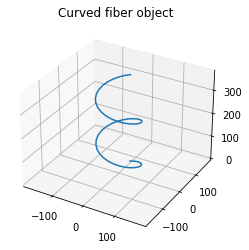

In [65]:
t = np.linspace(0, 4 * np.pi, 50, True)
traj = np.array((65 * np.sin(t), 65 * np.cos(t), 30 * (t))).T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(
    traj[:, 0],
    traj[:, 1],
    traj[:, 2],
)
plt.title("Curved fiber object")
set_3d_axes_equal(ax)
plt.show()

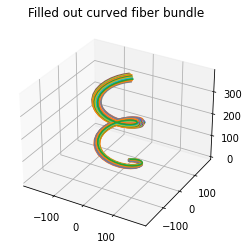

In [66]:
# populating line fiber 
fiber_bundle = sandbox.build.bundle(
    traj=traj,
    seeds=circ_seeds,
    radii=np.random.uniform(0.5, 0.8, circ_seeds.shape[0]),
    scale=0.25 + 0.5 * np.linspace(0, 1, traj.shape[0]))

# plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
for fiber in fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title("Filled out curved fiber bundle")
set_3d_axes_equal(ax)
plt.show()

# 2- Crossing Fibers 
   - Design a 90° crossing fiber bundle
      - Fill both fiber bundles (proportion 50/50) again with a number of individual fibers.
      - Use the fastpli.model.Solver class to generate a non colliding model.
      - What do you observe at the solving process?
          What do you observe on the solved model?
    
           - Change parameters:
            - Change the fiber segment obj_mean_length parameter.
            - Change the fiber min bending radius obj_min_radius parameter.
            - What do you observe at the solving process?
            - How does it affect the result?


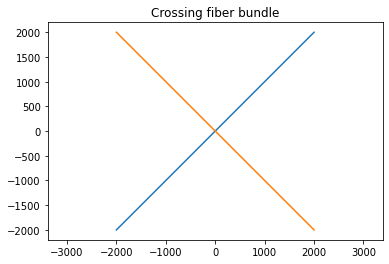

In [8]:
# two crossing main bundle
fb_0 = np.array([[-2000, -2000, 0], [-1000, -1000, 0], [0,0,0], [1000, 1000,0], [2000, 2000, 0]])
fb_1 = np.array([[-2000, 2000, 0], [-1000, 1000, 0], [0,0,0], [1000, -1000,0], [2000, -2000, 0]])

fig, ax = plt.subplots(1,1)
plt.plot(fb_0[:,0], fb_0[:,1])
plt.plot(fb_1[:,0], fb_1[:,1])
plt.title("Crossing fiber bundle")
ax.axis('equal')
plt.show()



In [6]:
import fastpli.model.solver
import fastpli.model.sandbox
import fastpli.io

import os

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def set_3d_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def plot_fiber_bundles(fbs, colors):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for fb, c in zip(fbs, colors):
        for f in fb:
            plt.plot(f[:,0],f[:,1],f[:,2], c)
    set_3d_axes_equal(ax)

# General imports for the 3d solver
 - These are the necessary modules and functions defined to equalise the 3 axes of a 3d plot

In [49]:
import fastpli.model.sandbox
import fastpli.model.solver
import fastpli.simulation
import fastpli.analysis
import fastpli.tools
import fastpli.io

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import multiprocessing as mp
import numpy as np
import scipy.interpolate as si

pool = mp.Pool(2)
np.random.seed(42)

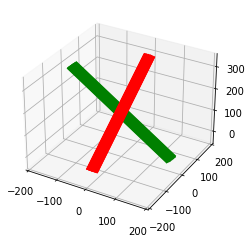

In [7]:
solver = fastpli.model.solver.Solver()

fiber_bundle_trj_x = [[170, 0, 0], [-170, 0, 300]] #green is x
fiber_bundle_trj_y = [[0, 170, 300], [0, -170, 0]] #red is y

population = fastpli.model.sandbox.seeds.triangular_circle(20, 6)

fiber_radii = np.random.uniform(2.0, 10.0, population.shape[0])
fiber_bundle_x = fastpli.model.sandbox.build.bundle(fiber_bundle_trj_x,
                                                    population, fiber_radii)

fiber_radii = np.random.uniform(2.0, 10.0, population.shape[0])
fiber_bundle_y = fastpli.model.sandbox.build.bundle(fiber_bundle_trj_y,
                                                    population, fiber_radii)

fiber_bundles = [fiber_bundle_x, fiber_bundle_y]
plot_fiber_bundles(fiber_bundles, ['g', 'r'])
plt.show()

solved: 586, 595/0


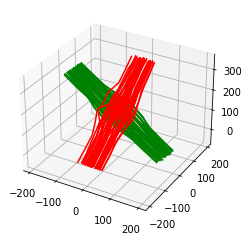

In [22]:
# run solver to split bundles into equal sizes
solver.fiber_bundles = fiber_bundles
solver.obj_min_radius = 13
solver.obj_mean_length = 60

N = 1000
for i in range(N):
    solved = solver.step()
    if solved:
        break
    print(f'{i/N*100:.2f}%', end='\r')
print(f'solved: {i}, {solver.num_obj}/{solver.num_col_obj}')

plot_fiber_bundles(solver.fiber_bundles, ['g', 'r'])
plt.show()

# 3- Simulation

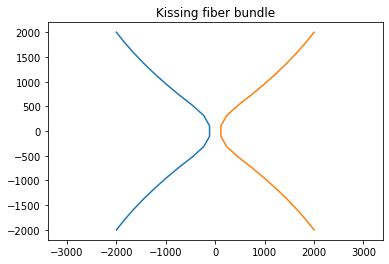

In [48]:
# Kissing fiber bundle
fb_0 = np.array([[-2000, -200, 0], [-500, -250, 0], [0,0,0], [500, 250,0], [2000, 200, 0]])
fb_1 = np.array([[-2000, 200, 0], [-500, 250, 0], [0,0,0], [500, -250,0], [2000, -200, 0]])

# left and right non crossing bundle
fb_left = np.array([[-2000,-2000,0], [-1050,-1000,0], [-100,0,0], [-1050,1000,0], [-2000,2000,0]])
fb_right = fb_left.copy()
fb_right[:,0] *= -1

# interpolate left and right bundle for line smoothing
N = 20
t = np.linspace(0,1,fb_left.shape[0])
t_intp = np.linspace(0,1,N)
fb_left = np.array([si.interp1d(t, fb_left[:,0], 'quadratic')(t_intp), si.interp1d(t, fb_left[:,1], 'quadratic')(t_intp), si.interp1d(t, fb_left[:,2], 'quadratic')(t_intp)]).T
fb_right = np.array([si.interp1d(t, fb_right[:,0], 'quadratic')(t_intp), si.interp1d(t, fb_right[:,1], 'quadratic')(t_intp), si.interp1d(t, fb_right[:,2], 'quadratic')(t_intp)]).T

fig, ax = plt.subplots(1,1)
plt.plot(fb_left[:,0], fb_left[:,1])
plt.plot(fb_right[:,0], fb_right[:,1])
plt.title("Kissing fiber bundle")
ax.axis('equal')
plt.show()